# Segmentación de hojas en plantas

## Proyecto final Visión artificial

### Integrantes:  - Andrés Stevens Arrieta Muñoz
####  - Rafael Angel Casalins Hernandez
####  - Alejandro Jiménez Zapata
####  - Carlos Andrés Mena Tobón
####  - Carlos Eduardo Ordoñez Bolañoz
####  - Luciana Serna Palacio

In [66]:
# Se importan las librerías necesarias 

import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import cv2
import os
from skimage.io import imread
import skimage.filters as filters
import os
from os import listdir
import plantcv as pcv

def plot(imagen,color='black',title=None,cmapa='gray',pic = False,subplot  = (1,1,1),vmin = 0, vmax = 255):
    if pic == True:
        plt.figure(figsize=(15,8))
    plt.subplot(subplot[0],subplot[1],subplot[2])
    plt.axis('off')
    plt.imshow(imagen,cmap = cmapa,vmin = vmin, vmax = vmax)
    plt.title(title,color = color)

def load_gray_image(image_path):
    
    coloured_image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(coloured_image, cv2.COLOR_BGR2GRAY)
    return gray_image

def plot_img_hist (image,title,subrows,subcols,num,size1,size2):
    fig = plt.figure(figsize=(size1,size2))
    plt.subplot(subrows,subcols,num)
    plt.imshow(image,cmap='gray');plt.title(title)
    color = ('r','g','b')
    plt.subplot(subrows,subcols,num+1)
    plt.title(" Histograma " + title)

    if len(image.shape) > 2 :            
        for i,col in enumerate(color):
            histr = cv2.calcHist([image],[i],None,[256],[0,256])
            plt.plot(histr,color = col)
            plt.xlim([0,256])
    else:
        hist,bins = np.histogram(image.ravel(),256,[0,256])
        plt.plot(hist, color='gray' )
        plt.xlim([0,256])

def threshold(img,tipo,t):
    _ , image = cv2.threshold(img,t,255,tipo)
    lista = {0:'THRESH_BINARY',
             1:'THRESH_BINARY_INV',
             2:'THRESH_TRUNC',
             3:'THRESH_TOZERO',
             4:'THRESH_TOZERO_INV',
             8:'THRESH_OTSU',
             16:'THRESH_TRIANGLE',
             7:'THRESH_MASK'    }
    plot(image, pic = True,subplot = (1,2,2),title = 'Imagen binarizada con tipo de umbralización {}.'.format(lista[tipo]))
    plot(img,subplot = (1,2,1), title= f'Imagen filtrada')
    return _

ModuleNotFoundError: No module named 'plantcv'

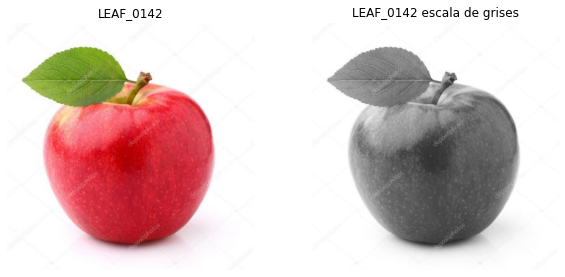

In [52]:
imagen = '0142'
carpeta = 'DataSet'
img_test = cv2.cvtColor(cv2.imread(f'{carpeta}/train/LEAF_{imagen}.jpg'), cv2.COLOR_BGR2RGB)
img_gray = load_gray_image(f'{carpeta}/train/LEAF_{imagen}.jpg')
plt.figure(figsize=(10,10))
plot(img_test,subplot=(2,2,1) ,title=f'LEAF_{imagen}')
plot(img_gray,subplot=(2,2,2) ,title=f'LEAF_{imagen} escala de grises')

In [53]:
# Rojo
abc_r = (1,0,0)
# Verde
abc_g = (0,1,0)
# Azul
abc_b = (0,0,1)

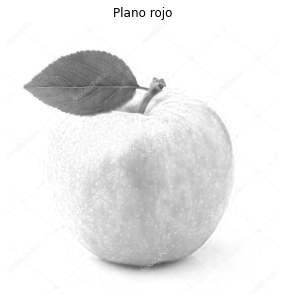

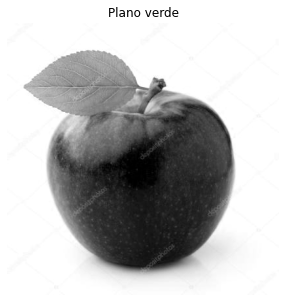

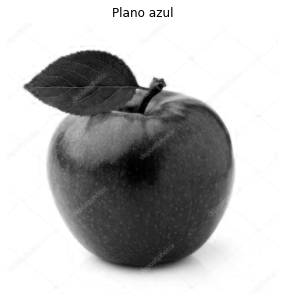

In [54]:
imagen_r = np.dot(img_test,abc_r)
imagen_g = np.dot(img_test,abc_g)
imagen_b = np.dot(img_test,abc_b)

plt.figure(figsize=(5,5))

plot(imagen_r,title="Plano rojo")

plt.figure(figsize=(5,5))
plot(imagen_g, title="Plano verde")

plt.figure(figsize=(5,5))
plot(imagen_b, title="Plano azul")

In [15]:
cv2.imwrite(f'DataSet/Canales/R/LEAF_{imagen}.jpg',imagen_r)


True

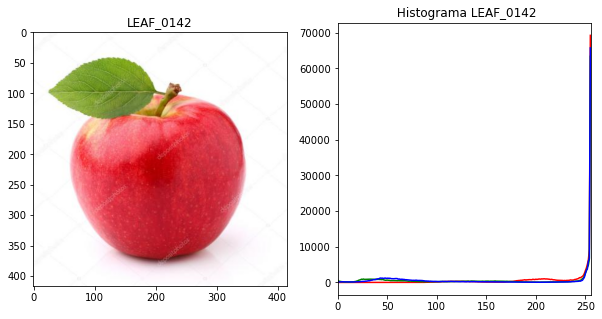

In [55]:
plot_img_hist(img_test,f'LEAF_{imagen}',1,2,1,10,5)

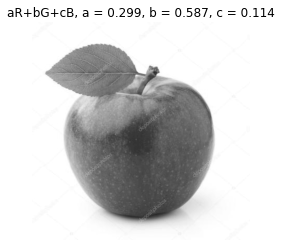

In [59]:
abc_leaf = (0.299,0.587,0.114)
leafs = np.dot(img_test,abc_leaf)
plot(leafs, title="aR+bG+cB, a = {}, b = {}, c = {}".format(abc_leaf[0],abc_leaf[1],abc_leaf[2]))

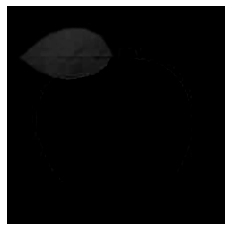

In [61]:
leaf = imagen_g - imagen_r
plot(leaf)

In [63]:
thresh1 = threshold(leaf,cv2.THRESH_BINARY,15)

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\thresh.cpp:1659: error: (-210:Unsupported format or combination of formats)  in function 'cv::threshold'


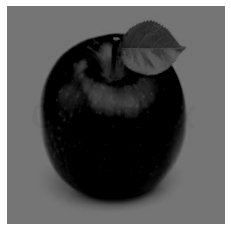

In [ ]:
final = leafs + thresh1
plot(final)